In [1]:
%matplotlib inline

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns

plt.style.use("./paper.mplstyle")

In [2]:
res_path = pathlib.Path("../results/rare/sim/")
res_files = res_path.glob("*.tsv")
dfs = []
for f in res_files:
    dfs.append(pd.read_table(f, sep="\t", index_col=0))
all_df = pd.concat(dfs)
all_df["log_var"] = np.log(all_df["est_var"])
all_df["depth"] = all_df["depth"].astype(int)
print(all_df.shape)
all_df.head()

(3000, 5)


,truth,est_mean,est_var,depth,log_var
0,0.531657,-1.310695,0.007229,5000,-4.929663
1,3.910751,2.048700,0.000050,5000,-9.900657
2,2.010023,0.037353,0.018907,5000,-3.968237
3,2.632405,0.808620,0.002024,5000,-6.202455
4,3.550602,1.696694,0.000225,5000,-8.399379


In [3]:
all_df.groupby("depth")["log_var"].mean()

depth
50     -0.872692
500    -3.265181
5000   -5.623158
Name: log_var, dtype: float64

In [4]:
all_df.groupby("depth").apply(lambda x: ss.spearmanr(x["truth"], x["est_mean"]).correlation)

depth
50      0.781808
500     0.957411
5000    0.995290
dtype: float64

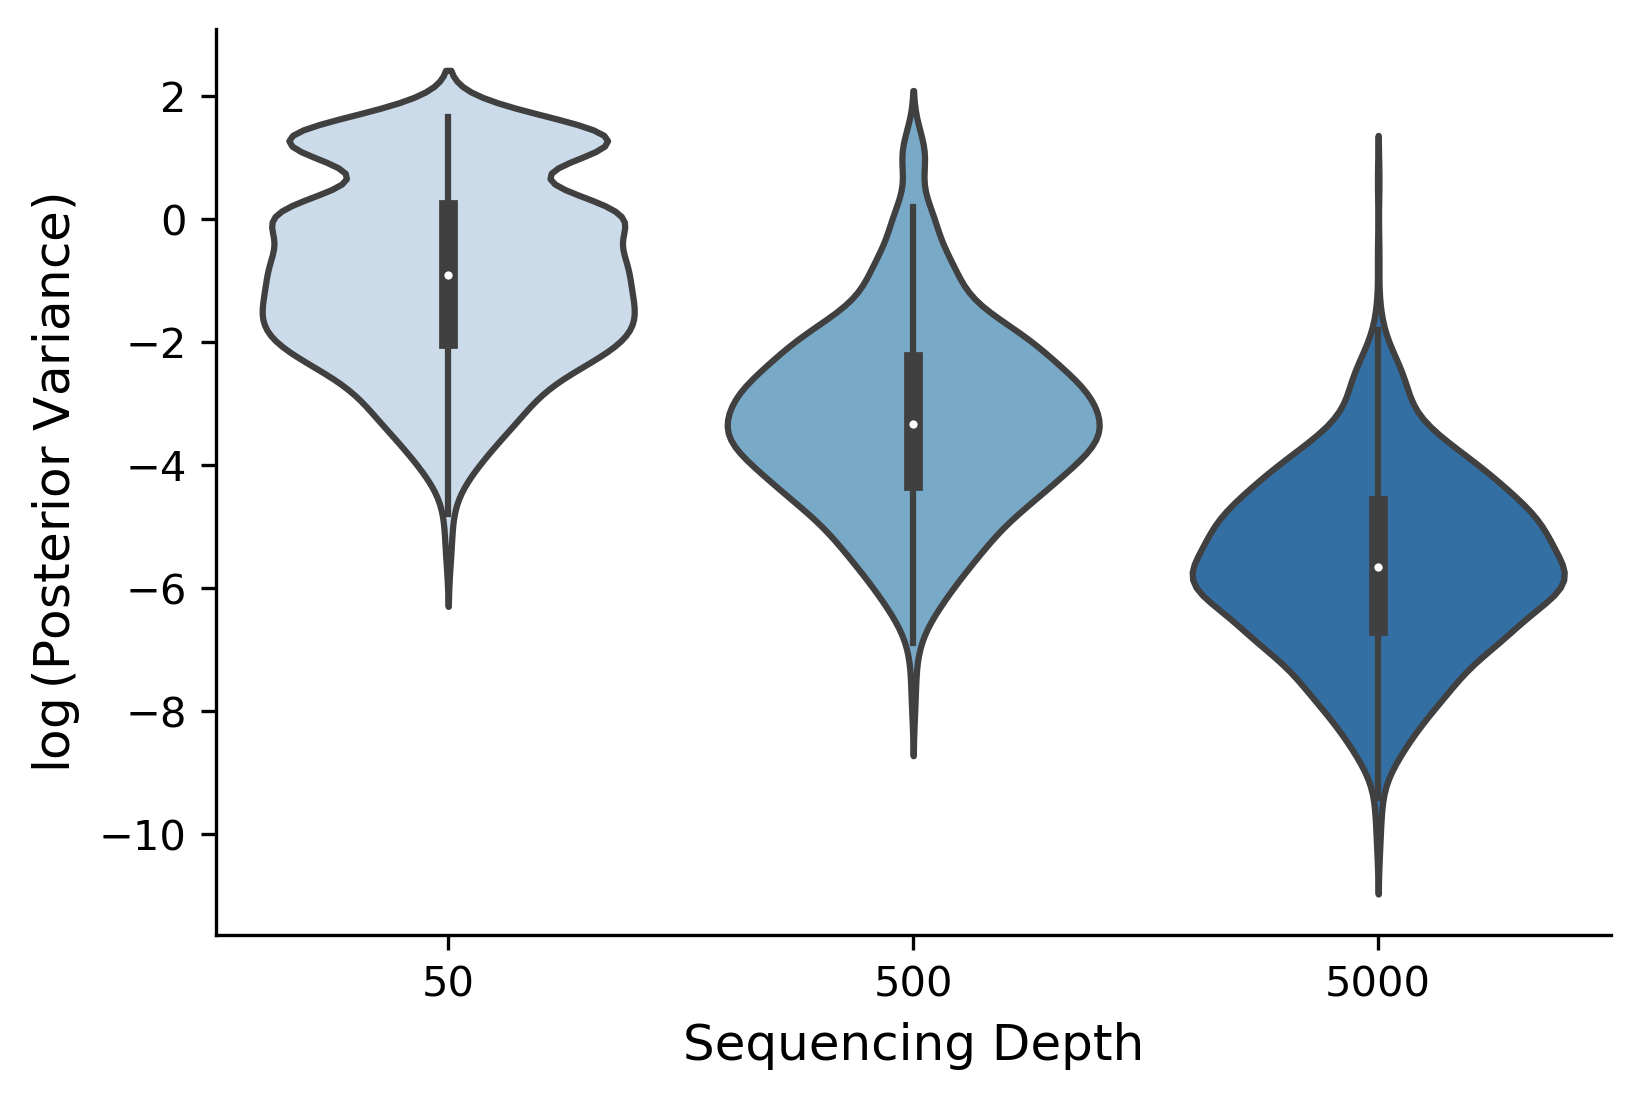

In [5]:
fig, ax = plt.subplots(1, 1)

sns.violinplot(
    data=all_df,
    x="depth",
    y="log_var",
    palette="Blues",
    scale="width",
    ax=ax
)

ax.set_xlabel("Sequencing Depth")
ax.set_ylabel(r"$\log\left(\mathrm{Posterior\ Variance}\right)$")

plt.show()